In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


<div style="display: flex; flex-direction: column; align-items: center; justify-content: center; gap: 10px;">
    <h1 style="text-align: center; font-size: 26px; font-weight: bold; font-family:'Nunito'; color: purple;">
        Chapter 1
    </h1>
</div>


**Gọi các gói cần thiết trong chương 1**

In [2]:
#!pip install pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from google.colab import data_table
from scipy.stats import kurtosis
import pyreadstat

In [3]:
# Bảng màu mẫu
palette = ["#53b0ae", "#a31414", "#2b6999", "#e37000", "#b2c615", "#88837d","#B3B3B3"]
labels = ["cyan", "Red", "Dark Blue", "Orange", "Green", "Gray","Light Gray"]

In [4]:
def sumdetail(df, column):
    """ Hiển thị thống kê chi tiết của một biến số giống Stata 'sum, detail' """

    # Tính các percentiles
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    x = df[column].dropna()
    percentile_values = np.percentile(x, percentiles)

    # Các thống kê khác
    obs = x.count()
    total = x.sum()
    mean = x.mean()
    std_dev = x.std()
    variance = x.var()
    skewness = x.skew()
    kurt = kurtosis(x, fisher=False)  # Nếu không dùng tuỳ chọn fisher=False kết quả của bạn phải trừ đi 3 để giống kết quả Stata
    smallest = x.nsmallest(3).values
    largest = x.nlargest(3).values

    # Hiển thị kết quả
    print(f"{column.upper()}\n" + "-"*60)
    print(f"{'Percentiles':<15}{'Smallest':<15}")
    for i in range(len(percentiles)):
        if i < 3:
            print(f"{percentiles[i]:<5}{percentile_values[i]:<15,.2f}{smallest[i]:<15,.2f}")
        else:
            print(f"{percentiles[i]:<5}{percentile_values[i]:<15,.2f}")

    print(f"\n{'Obs':<20}{obs:,}")
    print(f"{'Sum':<20}{total:,.2f}")
    print(f"{'Mean':<20}{mean:,.2f}")
    print(f"{'Std. Dev.':<20}{std_dev:,.2f}")
    print(f"{'Variance':<20}{variance:,.2f}")
    print(f"{'Skewness':<20}{skewness:.6f}")
    print(f"{'Kurtosis':<20}{kurt:.6f}")
    print(f"\n{'Largest':<15}")
    for i in range(3):
        print(f"{largest[i]:,.2f}")

In [5]:
df, meta = pyreadstat.read_dta ("/content/drive/MyDrive/econometrics/rawdata/migration_remittances_16_full.dta",encoding ='latin1')
#data_table.DataTable(df)

In [6]:
df.loc[0:19, ['per_expenditure', 'remittances']].map(lambda x: f"{x:.1f}")


per_expenditure remittances
0          57732.0     60000.0
1         119605.6     65000.0
2          59211.5      5000.0
3          54523.7      7000.0
4          66294.8     10000.0
5         147202.5      8000.0
6          46908.5     10000.0
7          65866.0      7000.0
8          38047.7      6000.0
9          37322.0     10000.0
10         50906.4      5000.0
11         54765.2     60000.0
12         44007.2     29500.0
13         37130.4      7000.0
14         19506.8      2000.0
15         65775.8     12000.0
16         58190.7      6000.0
17        263917.2     15000.0
18         51537.0     24000.0
19         35963.0      4000.0

Thống kê mô tả chi tiết

In [7]:
sumdetail(df, 'per_expenditure')

PER_EXPENDITURE
------------------------------------------------------------
Percentiles    Smallest       
1    4,963.69       1,439.00       
5    7,885.75       1,759.50       
10   10,057.20      2,054.80       
25   14,447.17      
50   21,311.50      
75   32,136.83      
90   46,488.60      
95   58,830.10      
99   105,417.56     

Obs                 9,399
Sum                 250,343,980.31
Mean                26,635.17
Std. Dev.           22,829.51
Variance            521,186,668.94
Skewness            5.771963
Kurtosis            64.152248

Largest        
457,283.25
363,633.00
362,254.50


Vẽ biểu đồ histogram

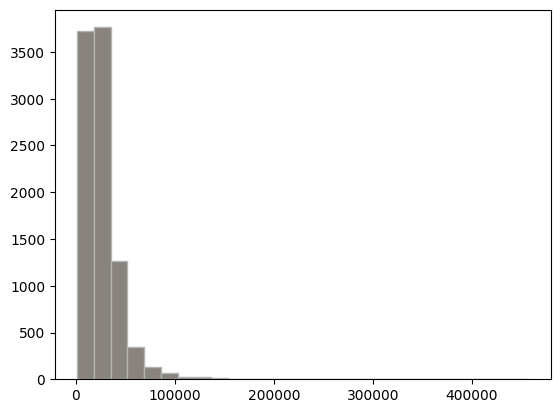

In [8]:
plt.hist(df["per_expenditure"], bins=27, edgecolor=palette[6], color=palette[5])
plt.show()

In [9]:
min_val = df["per_expenditure"].min()
max_val = df["per_expenditure"].max()
bin_size = (max_val - min_val) / 27  # Chia thành 27 khoảng

# Tạo biểu đồ
fig = go.Figure(go.Histogram(
    x=df["per_expenditure"],
    histnorm="percent",
    xbins=dict(start=min_val, end=max_val, size=bin_size)  # Chia bin theo kích thước cố định
))
# Cập nhật viền màu cho các cột
fig.update_traces(marker=dict(color= palette[5], line=dict(width=1,color= palette[6])))
fig.show()

In [10]:
mean_value = df['per_expenditure'].mean() #Trung bình
print(f"mean: {mean_value}")

mean: 26635.171859492824


In [11]:
median_value = np.percentile(df['per_expenditure'], 50) #Trung vị
print(f"median: {median_value}")

median: 21311.5


In [12]:
percentile_25 = np.percentile(df['per_expenditure'], 25)  # Tính bách phân vị 25
#or percentile_25 = df['per_expenditure'].quantile(0.25) with pandas
print("25th percentile:", percentile_25)

25th percentile: 14447.16650390625


In [13]:
percentile_75 = np.percentile(df['per_expenditure'], 75)  # Tính bách phân vị 75
print("75th percentile:", percentile_75)

75th percentile: 32136.8330078125


In [14]:
std_dev = df['per_expenditure'].std()       # Độ lệch chuẩn
print(f"Standard Deviation: {std_dev}")

Standard Deviation: 22829.513112253913


In [15]:
variance = df['per_expenditure'].var()      # Phương sai
print(f"Variance: {variance}")

Variance: 521186668.94257337


In [16]:
df1 , meta = pyreadstat.read_dta ("/content/drive/MyDrive/econometrics/rawdata/GDP_population.dta")
data_table.disable_dataframe_formatter()
# Hoặc chỉ hiển thị DataFrame cụ thể
data_table.DataTable(df1)

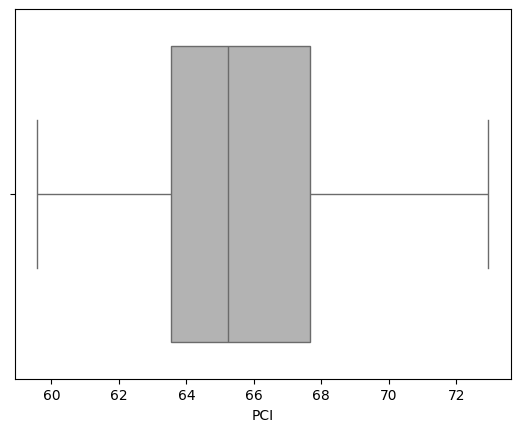

In [17]:
sns.boxplot(x='PCI', data=df1, orient='h',color= palette[6])
plt.show()

In [18]:
fig = go.Figure(go.Box(
    x=df1['PCI'],
    boxpoints='outliers',  # Hiển thị các outliers
    orientation='h',# Horizontal boxplot
    name='',
    marker=dict(
        color=palette[5],
        line=dict(color=palette[6])
    ),
))
fig.show()

In [19]:
df2, meta = pyreadstat.read_dta ("/content/drive/MyDrive/econometrics/rawdata/wage2020.dta", encoding='latin1')
#data_table.DataTable(df2)

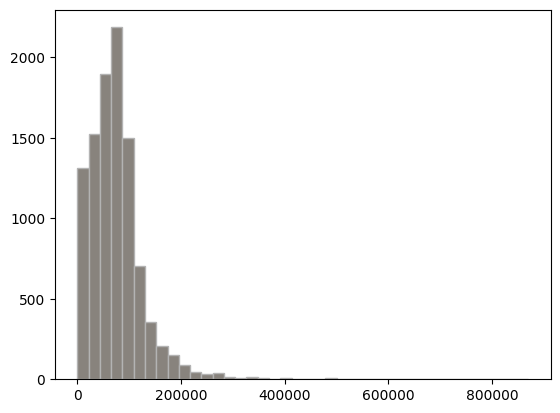

In [20]:
plt.hist(df2["wage"], bins=40, edgecolor=palette[6], color=palette[5])
plt.show()

In [21]:
df3=pd.read_excel("/content/drive/MyDrive/econometrics/rawdata/grade.xlsx")
data_table.DataTable(df3)

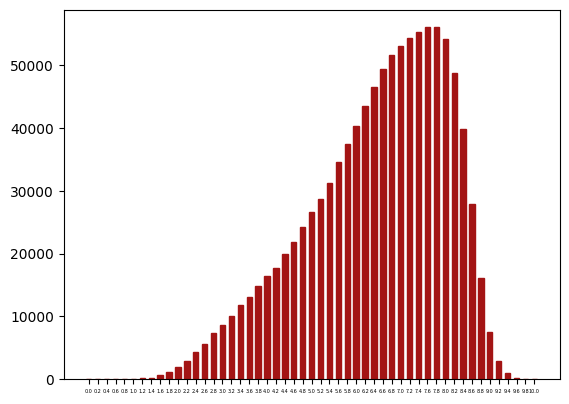

In [22]:
# Vẽ biểu đồ cột
plt.bar(df3["grade"].astype(str), df3["frequency"], width=0.6, color=palette[1], edgecolor=palette[1])
plt.xticks(fontsize=3.5)
plt.show()

In [23]:
df4, meta = pyreadstat.read_dta ("/content/drive/MyDrive/econometrics/rawdata/remittances_adolescents1.dta", encoding ='latin1')
data_table.DataTable(df4)

In [24]:
# Dùng bins rời rạc theo số nguyên duy nhất
bins = sorted(df4["num_edu_adolescents"].unique())


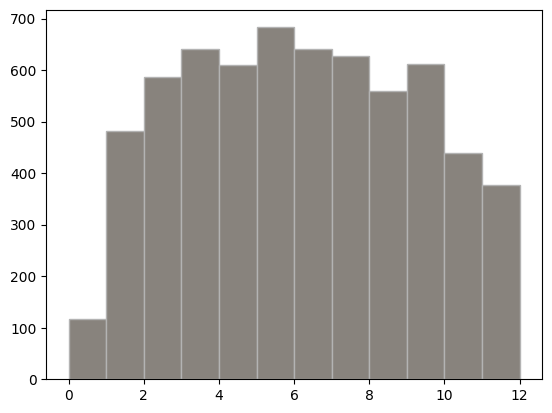

In [25]:
plt.hist(df4["num_edu_adolescents"], bins=bins, color=palette[5], edgecolor=palette[6])
plt.show()

In [26]:
sumdetail(df4,'num_edu_adolescents')

NUM_EDU_ADOLESCENTS
------------------------------------------------------------
Percentiles    Smallest       
1    0.00           0.00           
5    1.00           0.00           
10   2.00           0.00           
25   3.00           
50   6.00           
75   8.00           
90   10.00          
95   11.00          
99   11.00          

Obs                 6,374
Sum                 36,233.00
Mean                5.68
Std. Dev.           3.05
Variance            9.29
Skewness            0.061907
Kurtosis            1.964521

Largest        
12.00
12.00
12.00


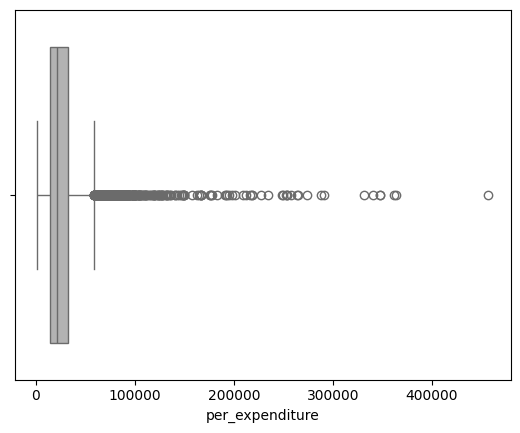

In [27]:
a=sns.boxplot(x='per_expenditure', data=df, orient='h',color= palette[6])
plt.show()

In [28]:
fig = go.Figure(go.Box(
    x=df['per_expenditure'],
    boxpoints='outliers',  # Hiển thị các outliers
    orientation='h',       # Horizontal boxplot
    name='',
    marker=dict(
        color=palette[5],
        line=dict(color=palette[6])
    ),
))
fig.show()

In [29]:
Q1 = df["per_expenditure"].quantile(0.25)
Q3 = df["per_expenditure"].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)


Q1: 14447.16650390625
Q3: 32136.8330078125
IQR: 17689.66650390625


In [30]:
df["outlier_per_expenditure"] = (
    (df["per_expenditure"] < lower_fence) | (df["per_expenditure"] > upper_fence)
).astype(int)


In [31]:
df["outlier_per_expenditure"].value_counts()

outlier_per_expenditure
0    8927
1     472
Name: count, dtype: int64

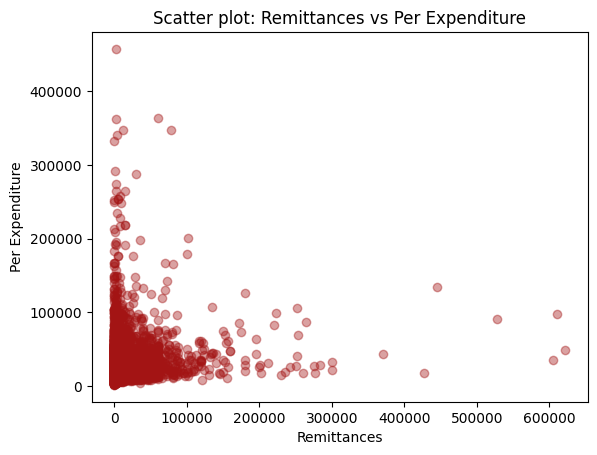

In [32]:
plt.scatter(df["remittances"], df["per_expenditure"], color=palette[1], alpha=0.4)
plt.xlabel("Remittances")
plt.ylabel("Per Expenditure")
plt.title("Scatter plot: Remittances vs Per Expenditure")
plt.show()

 1. Ma trận tương quan (correlation)

In [33]:
correlation = df[["per_expenditure", "remittances"]].corr()
correlation


per_expenditure  remittances
per_expenditure         1.000000     0.136289
remittances             0.136289     1.000000

2. Ma trận hiệp phương sai (covariance)

In [34]:
covariance = df[["per_expenditure", "remittances"]].cov()
covariance

per_expenditure   remittances
per_expenditure     5.211867e+08  7.560522e+07
remittances         7.560522e+07  5.904581e+08

<h2 style="font-size: 26px; font-weight: bold; font-family:'Nunito'; color: purple;">About the Authors:</h2>

<a href="https://www.linkedin.com/in/truongnhung2002"> Nhung Truong (Kristen Zhang) </a> has a degree in Investment Economics from UEH, with a focus on quantitative research. Her work revolves around data analysis and research. Currently, she is working at HAPRI as a research assistant.

## <h3 align="center"> © Nhung Truong. All rights reserved. <h3/>

<p>